# **IPL Data Analysis and 2025 winner prediction model**

This notebook presents a comprehensive analysis of Indian Premier League (IPL) data from the inception of the league in 2008 through to the most recent season in 2024, with the goal of uncovering key insights, trends, and patterns within the data. It includes data collection and preprocessing steps, exploratory data analysis (EDA) to visualize key metrics such as win rates, player performance, and team statistics, and statistical insights to identify significant factors influencing match outcomes. The notebook then introduces a Random Forest Classification model to predict the winner of the 2025 IPL season, explaining the model’s features, training, validation, and performance evaluation. The results section presents the model’s predictions for the 2025 season, discusses the potential strengths and limitations of the model, and provides insights into the predicted performance of teams and key players. The primary objective is to leverage historical IPL data to build a predictive model that forecasts future match outcomes, offering a data-driven prediction for the 2025 IPL winner while illustrating the application of machine learning techniques to real-world sports data.

The dataset can be viewed and downloaded from [this link](https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020). This is version 10.0 of the notebook. To see and run the notebook, explore the public notebook on Kaggle: [IPL Data Analysis and 2025 Winner Prediction Model](https://www.kaggle.com/code/deshitha210173t/ipl-data-analysis-2025-winner-prediction-model).


In [1]:
# prompt: connect to gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
deliveries_df = pd.read_csv('C:\\Users\\ASUS\\project\\IPL-Winner-Prediction-2025\\DataSet\\deliveries.csv')
matches_df = pd.read_csv('C:\\Users\\ASUS\\project\\IPL-Winner-Prediction-2025\\DataSet\\matches.csv')

print("Deliveries shape:", deliveries_df.shape)
print("Matches shape:", matches_df.shape)

deliveries = deliveries_df.copy()
matches = matches_df.copy()

Deliveries shape: (260920, 17)
Matches shape: (1095, 20)


# **IPL 2008 - 2024 Data Analysis**

In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


### **Data Cleaning**

In [9]:
# Drop rows with missing values in the 'winner' column
matches = matches.dropna(subset=['winner'])

In [10]:
# Impute missing valuse in 'player_of_match'
matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')

<ipython-input-10-8c22520191c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')


In [11]:
# Drop unwanted columns from the dataset
matches.drop(['id', 'city', 'method'], axis=1, inplace=True)

<ipython-input-11-21d62c0acf72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.drop(['id', 'city', 'method'], axis=1, inplace=True)


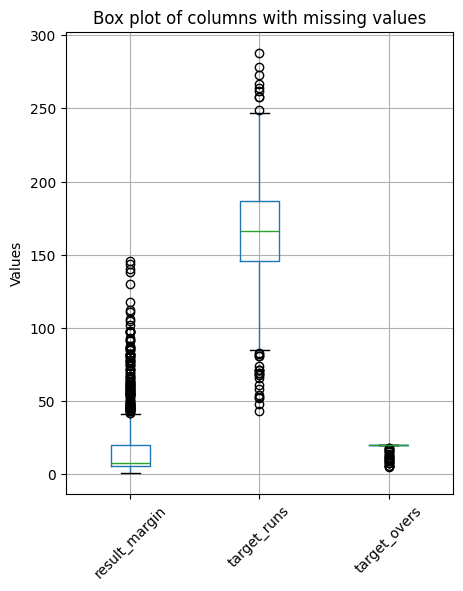

In [12]:
import matplotlib.pyplot as plt

columns_to_handle_missing = ['result_margin', 'target_runs', 'target_overs']

# Plot box plots for each column
plt.figure(figsize=(5, 6))
matches[columns_to_handle_missing].boxplot()
plt.title('Box plot of columns with missing values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Impute selected columns with median because they have outliers

matches['result_margin'] = matches['result_margin'].fillna(matches['result_margin'].median())
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].median())
matches['target_overs'] = matches['target_overs'].fillna(matches['target_overs'].median())

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   date             1090 non-null   object 
 2   match_type       1090 non-null   object 
 3   player_of_match  1090 non-null   object 
 4   venue            1090 non-null   object 
 5   team1            1090 non-null   object 
 6   team2            1090 non-null   object 
 7   toss_winner      1090 non-null   object 
 8   toss_decision    1090 non-null   object 
 9   winner           1090 non-null   object 
 10  result           1090 non-null   object 
 11  result_margin    1090 non-null   float64
 12  target_runs      1090 non-null   float64
 13  target_overs     1090 non-null   float64
 14  super_over       1090 non-null   object 
 15  umpire1          1090 non-null   object 
 16  umpire2          1090 non-null   object 
dtypes: float64(3), obje

In [15]:
matches.nunique()

,0
season,17
date,821
match_type,8
player_of_match,291
venue,58
team1,19
team2,19
toss_winner,19
toss_decision,2
winner,19


### **Feature Engineering**

In [16]:
# Extract date features
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['day'] = matches['date'].dt.day

# Drop the original date column
matches.drop('date', axis=1, inplace=True)

In [17]:
# Function to split season values
def split_season(season):
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20' + end) if len(end) == 2 else int(end)
    else:
        start = end = int(season)
    return start, end

# Apply the function to create new columns
matches[['season_start', 'season_end']] = matches['season'].apply(lambda x: pd.Series(split_season(x)))

# Convert to datetime and extract year
matches['season_start'] = pd.to_datetime(matches['season_start'], format='%Y').dt.year
matches['season_end'] = pd.to_datetime(matches['season_end'], format='%Y').dt.year

# Drop the original 'season' column
# matches.drop('season', axis=1, inplace=True)

In [18]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [19]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in the 'winner' column
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

In [20]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   match_type       1090 non-null   object 
 2   player_of_match  1090 non-null   object 
 3   venue            1090 non-null   object 
 4   team1            1090 non-null   object 
 5   team2            1090 non-null   object 
 6   toss_winner      1090 non-null   object 
 7   toss_decision    1090 non-null   object 
 8   winner           1090 non-null   object 
 9   result           1090 non-null   object 
 10  result_margin    1090 non-null   float64
 11  target_runs      1090 non-null   float64
 12  target_overs     1090 non-null   float64
 13  super_over       1090 non-null   object 
 14  umpire1          1090 non-null   object 
 15  umpire2          1090 non-null   object 
 16  year             1090 non-null   int32  
 17  month            10

# Feature Extraction from the matches dataset

In [21]:
matches.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


In [22]:
teams = pd.concat([matches['team1'], matches['team2']]).unique()
team_stats = pd.DataFrame(teams, columns=['team_name'])

team_stats

,team_name
0,Royal Challengers Bangalore
1,Punjab Kings
2,Delhi Capitals
3,Mumbai Indians
4,Kolkata Knight Riders
5,Rajasthan Royals
6,Sunrisers Hyderabad
7,Chennai Super Kings
8,Kochi Tuskers Kerala
9,Pune Warriors


In [23]:
# Calculate matches played and won
team_stats['matches_played'] = team_stats['team_name'].apply(lambda x: len(matches[(matches['team1'] == x) | (matches['team2'] == x)]))
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: len(matches[matches['winner'] == x]))
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,252,123,48.809524
1,Punjab Kings,246,112,45.528455
2,Delhi Capitals,250,115,46.000000
3,Mumbai Indians,261,144,55.172414
4,Kolkata Knight Riders,251,131,52.191235
5,Rajasthan Royals,219,112,51.141553
6,Sunrisers Hyderabad,257,117,45.525292
7,Chennai Super Kings,237,138,58.227848
8,Kochi Tuskers Kerala,14,6,42.857143
9,Pune Warriors,75,27,36.000000


In [24]:
team_stats['total_runs_scored'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_runs'].sum() + matches[matches['team2'] == x]['target_runs'].sum())
team_stats['total_wickets_taken'] = team_stats['team_name'].apply(lambda x: matches[matches['team1'] == x]['target_overs'].sum() + matches[matches['team2'] == x]['target_overs'].sum())

team_stats['total_runs_scored'] = team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken'] = team_stats['total_wickets_taken'].astype(int)

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975
1,Punjab Kings,246,112,45.528455,41178,4854
2,Delhi Capitals,250,115,46.000000,41234,4920
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Kolkata Knight Riders,251,131,52.191235,40557,4907
5,Rajasthan Royals,219,112,51.141553,36187,4358
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080
7,Chennai Super Kings,237,138,58.227848,39503,4693
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277
9,Pune Warriors,75,27,36.000000,11514,1471


In [25]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['batting_team'] == x]['total_runs'].sum() / (deliveries[deliveries['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: deliveries[deliveries['bowling_team'] == x]['total_runs'].sum() / (deliveries[deliveries['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307


In [26]:
# Exclude no-result matches from deliveries
no_result_match_ids = [501265, 829763, 829813, 1178424, 1359519]
filtered_deliveries = deliveries[~deliveries['match_id'].isin(no_result_match_ids)]

# Highest and lowest scores excluding no-result matches
highest_scores = filtered_deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].max())
team_stats['lowest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].min())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613,287,44
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99


In [27]:
# Total 4s and 6s
team_stats['total_4s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 4)].shape[0])
team_stats['total_6s'] = team_stats['team_name'].apply(lambda x: deliveries[(deliveries['batting_team'] == x) & (filtered_deliveries['batsman_runs'] == 6)].shape[0])

# Average Powerplay and Death overs scores
powerplay_scores = deliveries[(deliveries['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries[(deliveries['over'] > 15)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score'] = team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team'] == x]['total_runs'].mean())
team_stats['average_death_overs_score'] = team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team'] == x]['total_runs'].mean())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58,3088,1233,53.518182,35.517073
6,Sunrisers Hyderabad,257,117,45.525292,42118,5080,163.883268,7.985442,8.040613,287,44,2405,1042,55.879121,36.261628
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55,3196,1509,53.295359,39.741228
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74,170,53,54.928571,30.636364
9,Pune Warriors,75,27,36.000000,11514,1471,153.520000,7.008635,7.539307,192,99,525,196,47.577778,30.909091


# Feature extraction from the deliveries dataset

In [28]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [29]:
# Add 'balls_faced'
batgroup = deliveries.groupby(['batter'])
batsman_stats = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball': 'balls_faced'})
batsman_stats.head()

,balls_faced
batter,
A Ashish Reddy,196
A Badoni,505
A Chandila,7
A Chopra,75
A Choudhary,20


In [30]:
# Add 'innings'
batsman_stats['innings'] = batgroup['inning'].nunique()
batsman_stats.head()

,balls_faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,505,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [31]:
# Add 'runs'
batsman_stats['runs'] = batgroup['batsman_runs'].sum()
batsman_stats.head()

,balls_faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,505,2,634
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [32]:
# Add '0s'
batsman_stats['0s'] = deliveries[deliveries['batsman_runs'] == 0].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'0s': 0}, inplace=True)
batsman_stats['0s'] = batsman_stats['0s'].astype(int)

batsman_stats['1s'] = deliveries[deliveries['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'1s': 0}, inplace=True)
batsman_stats['1s'] = batsman_stats['1s'].astype(int)

batsman_stats['2s'] = deliveries[deliveries['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'2s': 0}, inplace=True)
batsman_stats['2s'] = batsman_stats['2s'].astype(int)

batsman_stats['3s'] = deliveries[deliveries['batsman_runs'] == 3].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'3s': 0}, inplace=True)
batsman_stats['3s'] = batsman_stats['3s'].astype(int)

batsman_stats['4s'] = deliveries[deliveries['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'4s': 0}, inplace=True)
batsman_stats['4s'] = batsman_stats['4s'].astype(int)

batsman_stats['6s'] = deliveries[deliveries['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'6s': 0}, inplace=True)
batsman_stats['6s'] = batsman_stats['6s'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15
A Badoni,505,2,634,183,201,48,3,46,24
A Chandila,7,1,4,3,4,0,0,0,0
A Chopra,75,2,53,45,21,2,0,7,0
A Choudhary,20,2,25,4,13,1,0,1,1


In [33]:
# Add 'highest_score'
batsman_stats['highest_score'] = deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max()

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36
A Badoni,505,2,634,183,201,48,3,46,24,59
A Chandila,7,1,4,3,4,0,0,0,0,4
A Chopra,75,2,53,45,21,2,0,7,0,24
A Choudhary,20,2,25,4,13,1,0,1,1,15


In [34]:
# Add 'player_out'
batsman_stats['player_out'] = batgroup['is_wicket'].count()
batsman_stats.head()

batsman_stats['player_out'] = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count()
batsman_stats.fillna({'player_out': 0}, inplace=True) # there might be not-out matches
batsman_stats['player_out'] = batsman_stats['player_out'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out
batter,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15
A Badoni,505,2,634,183,201,48,3,46,24,59,26
A Chandila,7,1,4,3,4,0,0,0,0,4,1
A Chopra,75,2,53,45,21,2,0,7,0,24,5
A Choudhary,20,2,25,4,13,1,0,1,1,15,2


In [35]:
# Add 'batting_avg'
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0, axis=1)

# Add 'batting_strike_rate'
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced'] > 0 else 0, axis=1)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out,batting_avg,batting_strike_rate
batter,,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15,18.67,142.86
A Badoni,505,2,634,183,201,48,3,46,24,59,26,24.38,125.54
A Chandila,7,1,4,3,4,0,0,0,0,4,1,4.00,57.14
A Chopra,75,2,53,45,21,2,0,7,0,24,5,10.60,70.67
A Choudhary,20,2,25,4,13,1,0,1,1,15,2,12.50,125.00


In [36]:
# Add 'balls_throw'
bowlgroup = deliveries.groupby(['bowler'])
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})
bowler_stats.head()

,balls_throw
bowler,
A Ashish Reddy,270
A Badoni,25
A Chandila,234
A Choudhary,108
A Dananjaya,25


In [37]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [38]:
# Add 'wickets'
wickets = deliveries[deliveries['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_stats['wickets'] = wickets.groupby(['bowler'])['ball'].count()
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)
bowler_stats.head()

,balls_throw,wickets
bowler,,
A Ashish Reddy,270,18
A Badoni,25,2
A Chandila,234,11
A Choudhary,108,5
A Dananjaya,25,0


In [39]:
# Add 'overs'
bowler_stats['overs'] = round(bowler_stats['balls_throw']/6).astype(int)
bowler_stats.fillna({'overs': 0}, inplace=True)
bowler_stats.head()

,balls_throw,wickets,overs
bowler,,,
A Ashish Reddy,270,18,45
A Badoni,25,2,4
A Chandila,234,11,39
A Choudhary,108,5,18
A Dananjaya,25,0,4


In [40]:
# Add 'runs_conceded'
bowler_stats['runs_conceded'] = deliveries.groupby('bowler')['batsman_runs'].sum()
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra_runs to the 'runs_conceded'
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].add(deliveries[deliveries['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['extra_runs'].sum(), fill_value=0)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)
bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18,45,396
A Badoni,25,2,4,36
A Chandila,234,11,39,242
A Choudhary,108,5,18,144
A Dananjaya,25,0,4,47


In [41]:
# Add 'bowling_econ'
bowler_stats['bowling_econ'] = bowler_stats.apply(
    lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'),
    axis=1
)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(
    lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'),
    axis=1
)

bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18,45,396,8.80,15.00
A Badoni,25,2,4,36,9.00,12.50
A Chandila,234,11,39,242,6.21,21.27
A Choudhary,108,5,18,144,8.00,21.60
A Dananjaya,25,0,4,47,11.75,inf


In [42]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in deliveries.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['matches'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

players.head()

,matches
players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1


In [43]:
# Catches Caught by Players
outbyCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = deliveries[(deliveries['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catches.fillna(0, inplace=True)
catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
catches['catches'] = catches['catches'].astype(int)

catches.head()

,catches
A Ashish Reddy,9
A Badoni,14
A Chandila,7
A Chopra,2
A Flintoff,4


In [44]:
# Merging Batsman Stats
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match of not
players = players.merge(matches['player_of_match'].value_counts().rename('man_of_the_match_count'),
                        left_index=True, right_index=True, how='left').fillna(0)

# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
players.fillna(0, inplace=True)

players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [45]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893


In [46]:
matches.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


# **Data Analysis**

In [47]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Team Performance

In [48]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,252,123,48.809524,42542,4975,168.817460,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Punjab Kings,246,112,45.528455,41178,4854,167.390244,8.373482,8.523590,262,106,795,440,57.696429,38.622642
2,Delhi Capitals,250,115,46.000000,41234,4920,164.936000,8.167367,8.235556,257,92,1352,550,58.879121,35.292135
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893


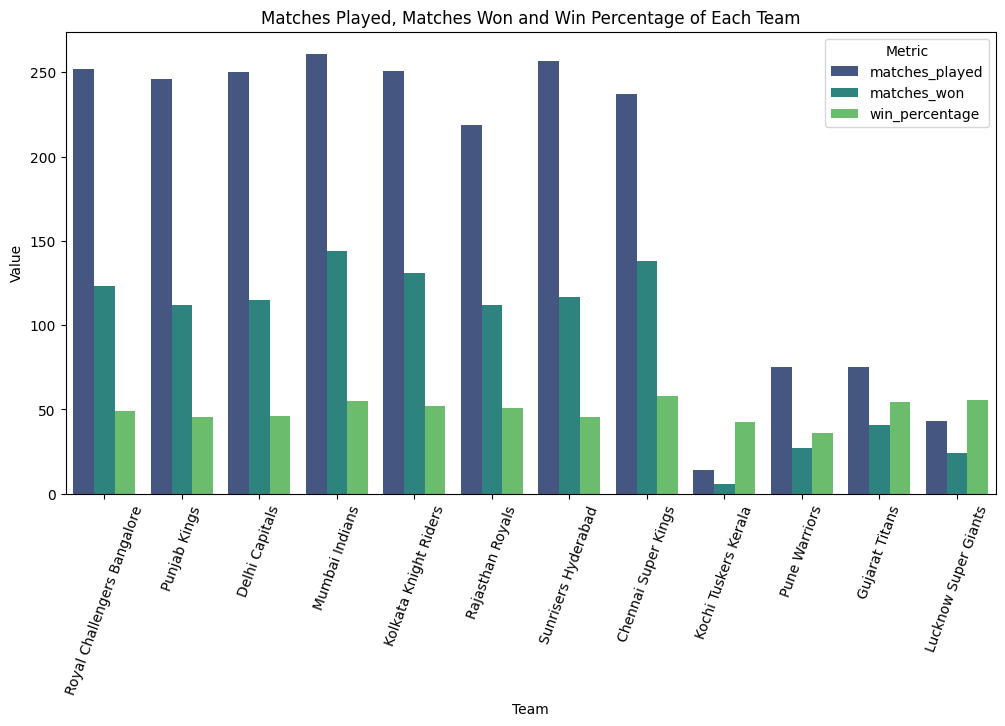

In [49]:
# Plotting Matches Played & Winning Percentage
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['matches_played', 'matches_won', 'win_percentage'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Matches Played, Matches Won and Win Percentage of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()

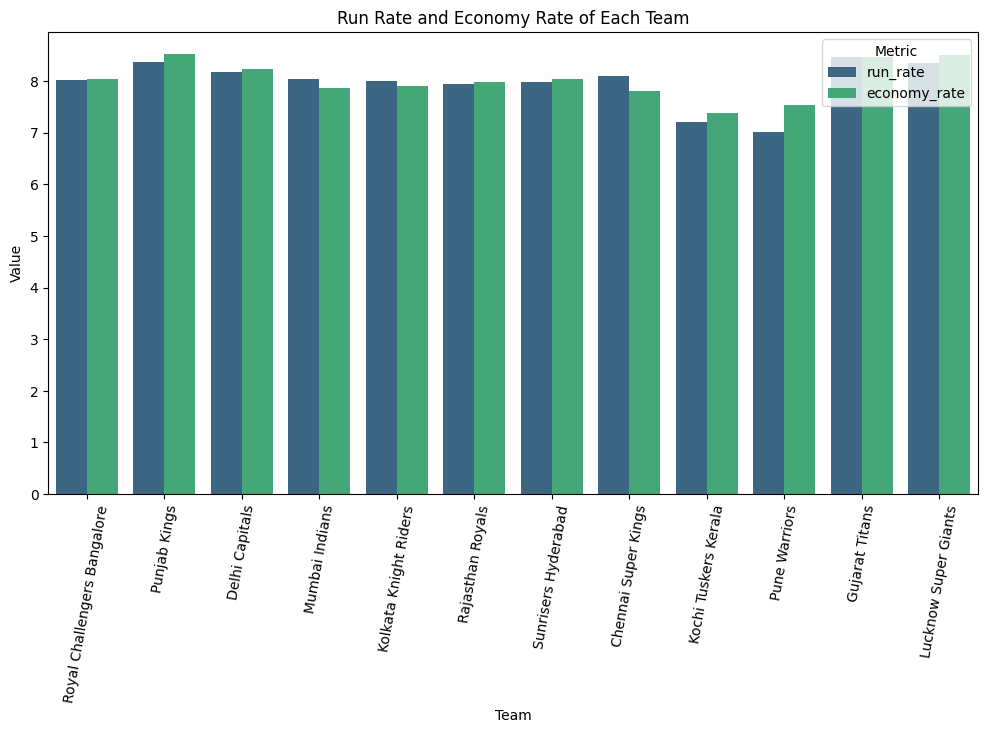

In [50]:
# Plotting Run Rate & Economy Rate
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['run_rate', 'economy_rate'],
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()

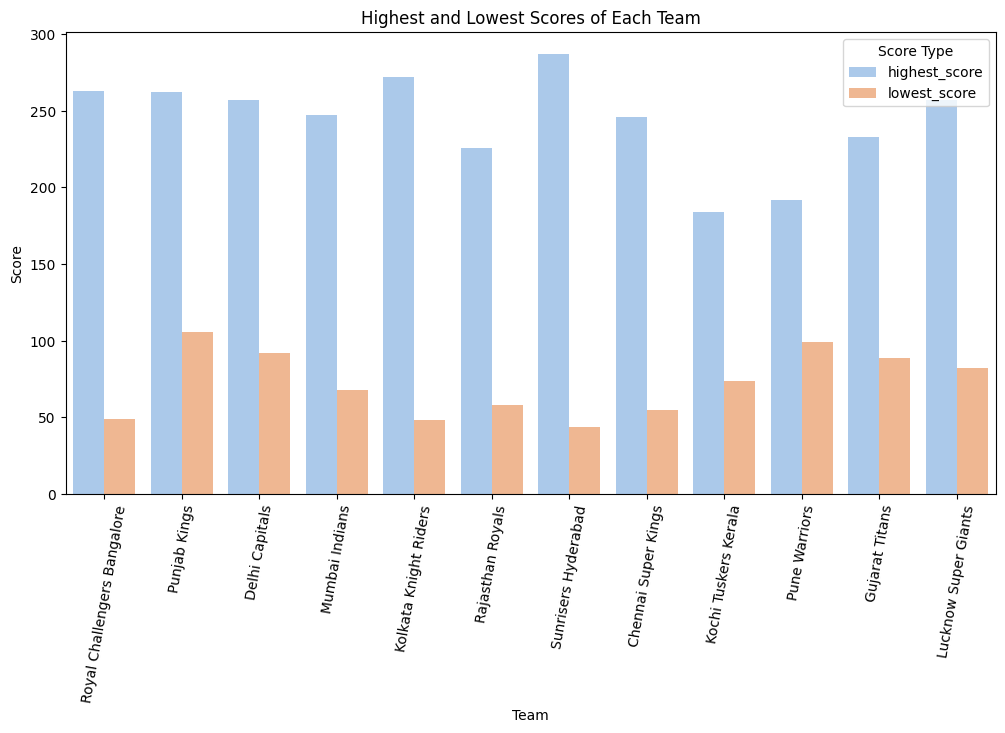

In [51]:
# Plotting Highest and Lowest Scores
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['highest_score', 'lowest_score'],
                                    var_name='Score Type', value_name='Score')

sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette='pastel')
plt.title('Highest and Lowest Scores of Each Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=80)
plt.show()

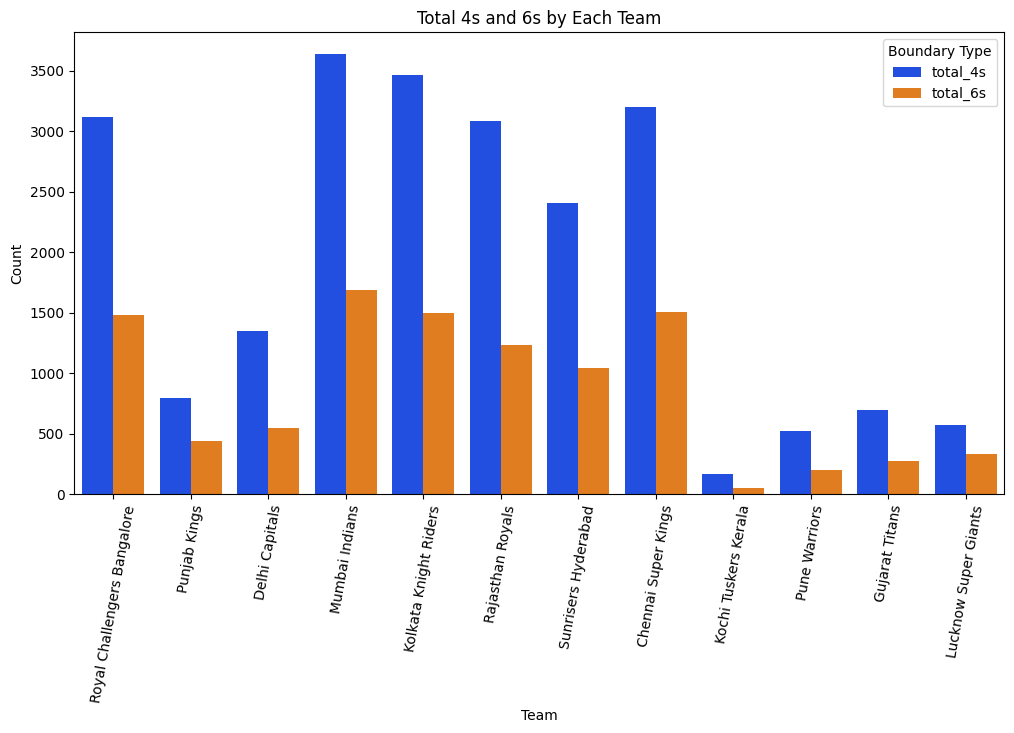

In [52]:
# Plotting Total 4s and 6s
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['total_4s', 'total_6s'],
                                    var_name='Boundary Type', value_name='Count')
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='bright')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

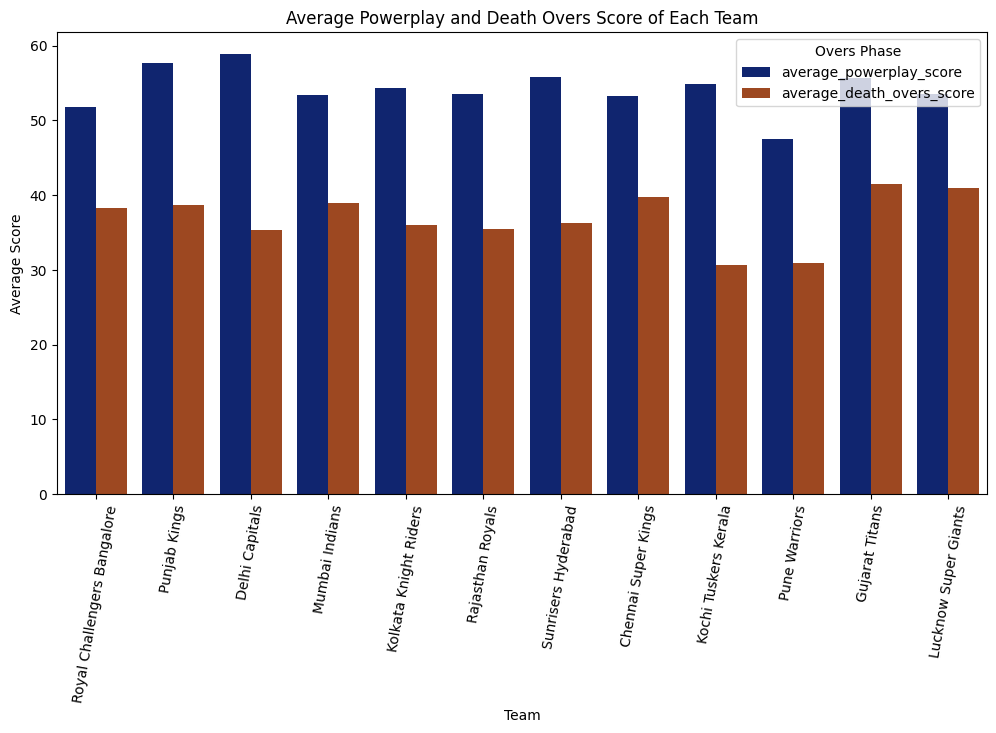

In [53]:
# Plotting Average Powerplay and Death Overs Score
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['average_powerplay_score', 'average_death_overs_score'],
                                    var_name='Overs Phase', value_name='Average Score')
sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='dark')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()

## 2. Player Performance

In [54]:
players.head()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,batting_avg,batting_strike_rate,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate,catches,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


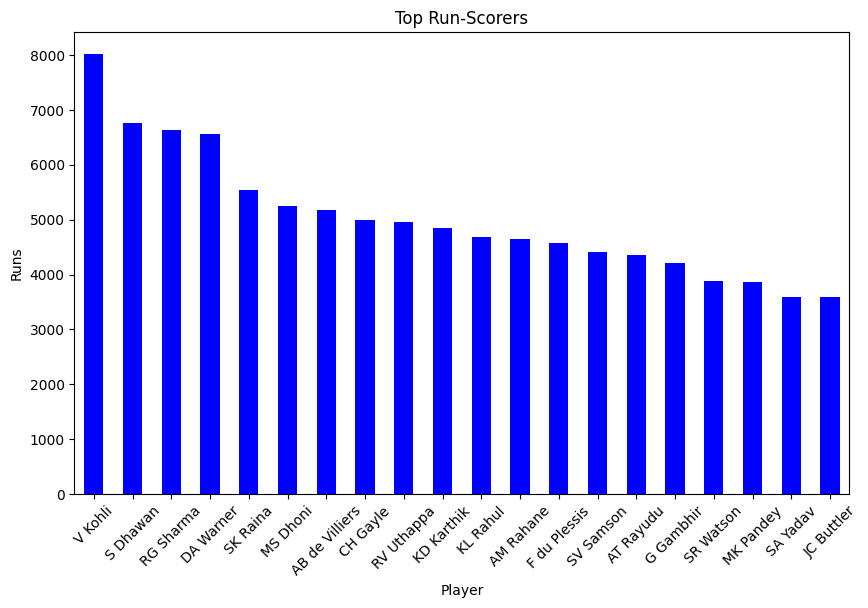

In [55]:
# Plotting top run-scorers
plt.figure(figsize=(10, 6))
top_run_scorers = players['runs'].nlargest(20)
top_run_scorers.plot(kind='bar', color='blue')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45)
plt.show()

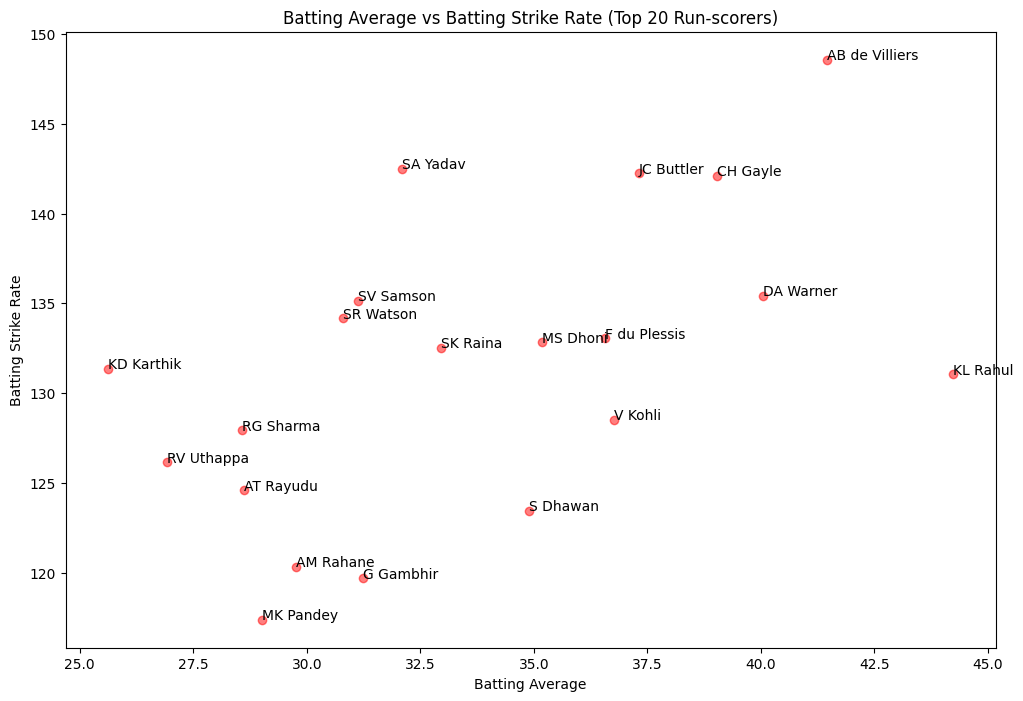

In [56]:
# Get the top 20 run-scorers
top_run_scorers = players.nlargest(20, 'runs')

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg'], top_run_scorers['batting_strike_rate'], color='red', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with the player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg'], player['batting_strike_rate']))

plt.show()

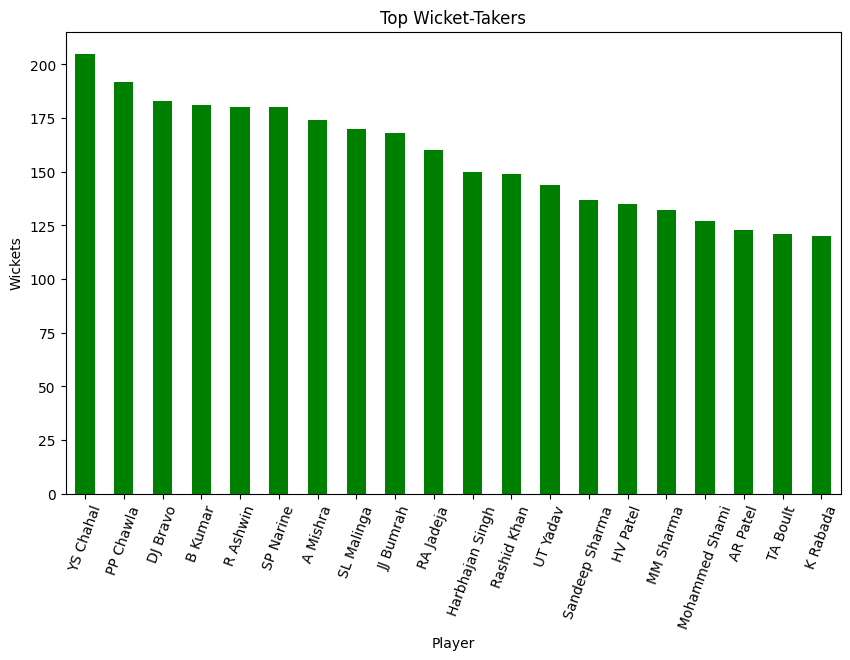

In [57]:
# Plotting top wicket-takers
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='green')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()

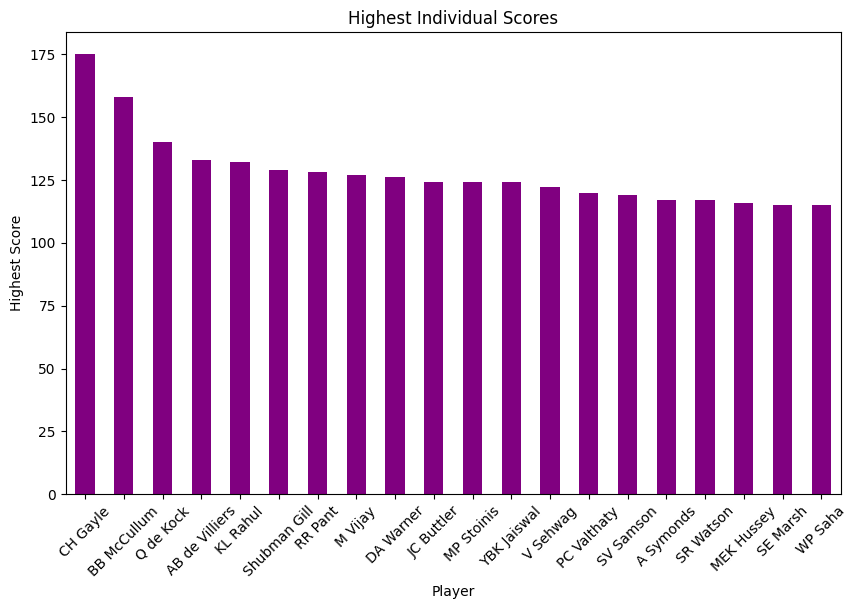

In [58]:
# Plotting top highest individual scores
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='purple')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

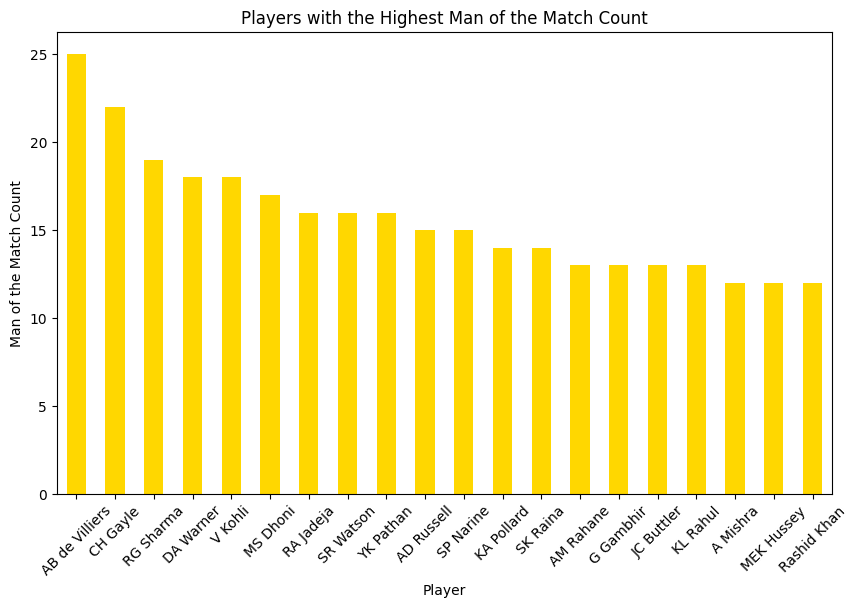

In [59]:
# Man of the Match Count
plt.figure(figsize=(10, 6))
top_mom_players = players['man_of_the_match_count'].nlargest(20)
top_mom_players.plot(kind='bar', color='gold')
plt.xlabel('Player')
plt.ylabel('Man of the Match Count')
plt.title('Players with the Highest Man of the Match Count')
plt.xticks(rotation=45)
plt.show()

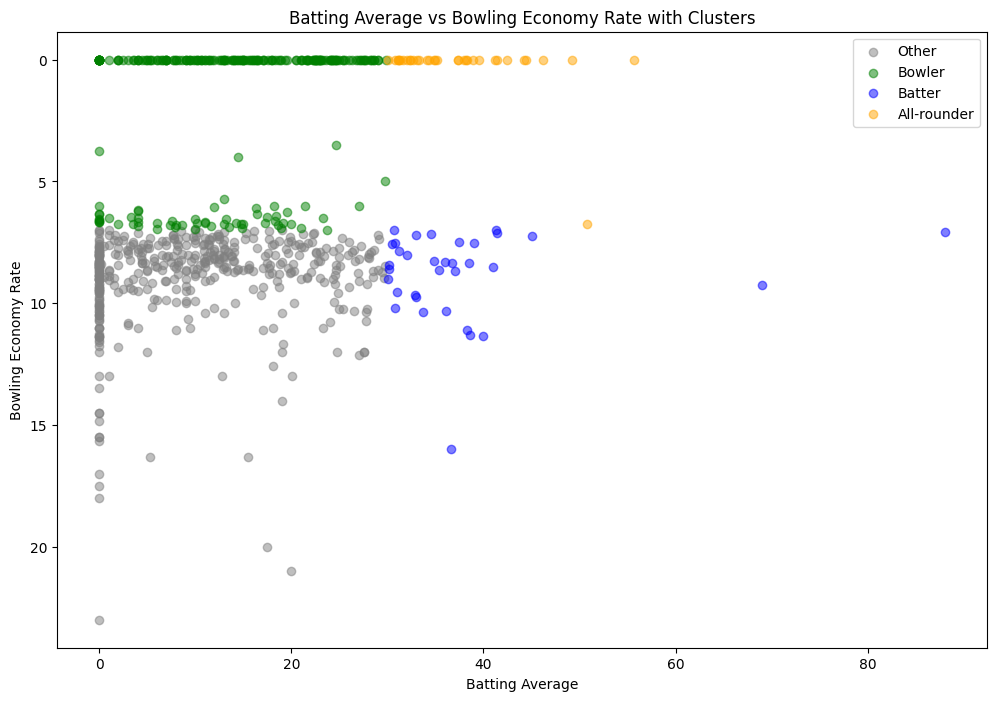

In [60]:
# Define thresholds for clustering
batting_avg_threshold = 30
bowling_econ_threshold = 7

# Identify clusters
players['cluster'] = 'Other'
players.loc[players['batting_avg'] > batting_avg_threshold, 'cluster'] = 'Batter'
players.loc[players['bowling_econ'] < bowling_econ_threshold, 'cluster'] = 'Bowler'
players.loc[(players['batting_avg'] > batting_avg_threshold) & (players['bowling_econ'] < bowling_econ_threshold), 'cluster'] = 'All-rounder'

# Plotting Batting Average vs Bowling Economy Rate with clusters
plt.figure(figsize=(12, 8))
colors = {'Batter': 'blue', 'Bowler': 'green', 'All-rounder': 'orange', 'Other': 'grey'}

for cluster in players['cluster'].unique():
    subset = players[players['cluster'] == cluster]
    plt.scatter(subset['batting_avg'], subset['bowling_econ'],
                color=colors[cluster], label=cluster, alpha=0.5)

plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.gca().invert_yaxis()  # Invert y-axis to show better economy rates higher up
plt.legend()
plt.show()

## 3. Seasonal Analysis

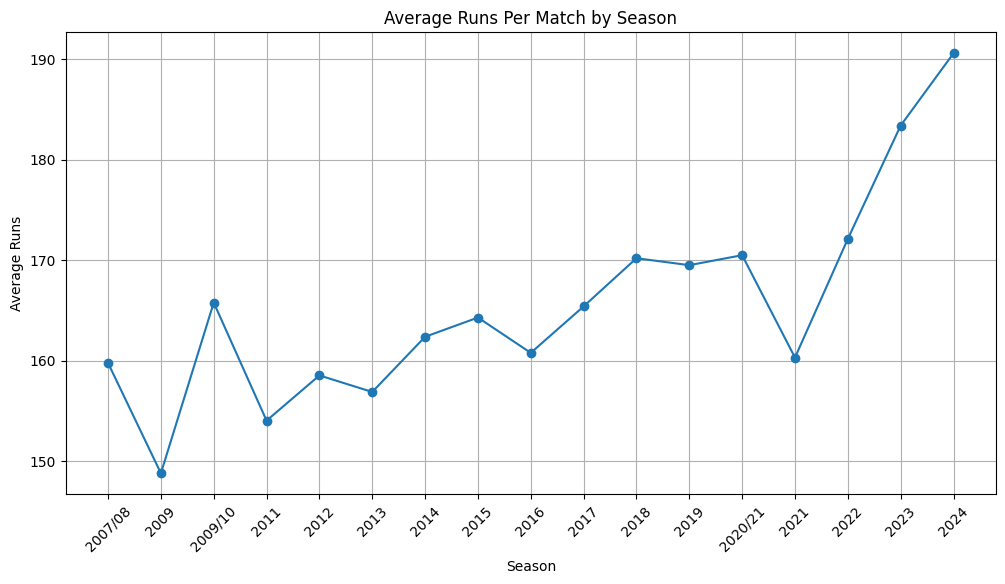

In [61]:
# Calculate average runs per match per season
seasonal_runs = matches.groupby('season').agg({'target_runs': 'mean'}).reset_index()
seasonal_runs.columns = ['season', 'average_runs']

plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['season'], seasonal_runs['average_runs'], marker='o')
plt.title('Average Runs Per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Winner Prediction Model**

In [62]:
deliveries = deliveries_df.copy()
matches = matches_df.copy()

In [63]:
inning_scores = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inning_scores = inning_scores[inning_scores['inning']==1]
inning_scores.head()

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [64]:
inning_scores['target'] = inning_scores['total_runs'] + 1
inning_scores.head()

,match_id,inning,total_runs,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111


In [65]:
matches.rename(columns={'id': 'match_id'}, inplace=True)
matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [66]:
matches = matches.merge(inning_scores[['match_id','target']], on='match_id')
matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111


In [67]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [68]:
# Mapping dictionary for old names to standardized names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

# Replace the team names in team columns
matches[team_columns] = matches[team_columns].replace(team_name_mapping)

In [69]:
# Teams that will play in 2025 season
teams_2025 = [
    'Chennai Super Kings',
    'Delhi Capitals',
    'Gujarat Titans',
    'Kolkata Knight Riders',
    'Lucknow Super Giants',
    'Mumbai Indians',
    'Punjab Kings',
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
]

# Extracting only the selected teams
matches = matches[matches['team1'].isin(teams_2025)]
matches = matches[matches['team2'].isin(teams_2025)]

matches.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,target
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,111


In [70]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [71]:
# Rplace city names
map_city_names = {'Bengaluru': 'Bangalore'}
matches['city'] = matches['city'].replace(map_city_names)

matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [72]:
matches.isnull().sum()

,0
match_id,0
season,0
city,51
date,0
match_type,0
player_of_match,4
venue,0
team1,0
team2,0
toss_winner,0


In [73]:
# Extracting only selected columns
matches = matches[['match_id', 'season', 'city', 'team1', 'team2', 'winner', 'target']].dropna()
matches.head()

,match_id,season,city,team1,team2,winner,target
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223
1,335983,2007/08,Chandigarh,Punjab Kings,Chennai Super Kings,Chennai Super Kings,241
2,335984,2007/08,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,130
3,335985,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,166
4,335986,2007/08,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,111


In [74]:
matches.isnull().sum()

,0
match_id,0
season,0
city,0
team1,0
team2,0
winner,0
target,0


In [75]:
# Replace the team names in the 'batting_team' column
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)

deliveries = deliveries[deliveries['batting_team'].isin(teams_2025)]
deliveries = deliveries[deliveries['bowling_team'].isin(teams_2025)]
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [76]:
# Merge to the final dataset
final = matches.merge(deliveries, on='match_id')
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [77]:
# Get only second inning matches
final = final[final['inning'] == 2]
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [78]:
# Add 'current_score'
final.loc[:, 'current_score'] = final.groupby('match_id')['total_runs'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [81]:
# Add 'runs_left'
import numpy as np
final.loc[:, 'runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,1,NaN,0,NaN,NaN,NaN,1,222
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,1,1,wides,0,NaN,NaN,NaN,2,221
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,1,NaN,0,NaN,NaN,NaN,3,220
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,1,NaN,0,NaN,NaN,NaN,4,219


In [82]:
# Add 'balls_left'
final.loc[:, 'balls_left'] = np.where(120 - final['over']*6 - final['ball']>=0, 120 - final['over']*6 - final['ball'], 0)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,1,NaN,0,NaN,NaN,NaN,4,219,115


In [83]:
# Add 'wickets_left'
final.loc[:, 'wickets_left'] = 10 - final.groupby('match_id')['is_wicket'].cumsum()
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,1,222,119,10
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,wides,0,NaN,NaN,NaN,2,221,118,10
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,0,NaN,NaN,NaN,2,221,117,10
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,3,220,116,10
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,NaN,0,NaN,NaN,NaN,4,219,115,10


In [84]:
# Calculate 'current_run_rate'
final['current_run_rate'] = np.where(
    120 - final['balls_left'] > 0,
    (final['current_score'] * 6) / (120 - final['balls_left']),
    0
)

# Calculate 'required_run_rate'
final['required_run_rate'] = np.where(
    final['balls_left'] > 0,
    (final['runs_left'] * 6) / final['balls_left'],
    np.where(final['runs_left'] > 0, 1e6, 0)
)

final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,1,222,119,10,6.0,11.193277
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,2,221,118,10,6.0,11.237288
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,2,221,117,10,4.0,11.333333
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,3,220,116,10,4.5,11.379310
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,NaN,NaN,NaN,4,219,115,10,4.8,11.426087


In [85]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final['result'] = final.apply(result, axis=1)
final.head()

,match_id,season,city,team1,team2,winner,target,inning,batting_team,bowling_team,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
124,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,1,222,119,10,6.0,11.193277,0
125,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2,221,118,10,6.0,11.237288,0
126,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,2,221,117,10,4.0,11.333333,0
127,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,3,220,116,10,4.5,11.379310,0
128,335982,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,...,NaN,NaN,NaN,4,219,115,10,4.8,11.426087,0


In [86]:
winning_pred = final[['season', 'batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target', 'result']]
winning_pred.head()

,season,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
124,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,6.0,11.193277,223,0
125,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,6.0,11.237288,223,0
126,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,4.0,11.333333,223,0
127,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,4.5,11.379310,223,0
128,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,4.8,11.426087,223,0


In [87]:
winning_pred['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [88]:
season_2024 = winning_pred[winning_pred['season'] == '2024']
other_seasons = winning_pred[winning_pred['season'] != '2024']

# Define X and y for both datasets
X_train_23 = other_seasons.drop(['result', 'season'], axis=1)
y_train_23 = other_seasons['result']

X_test_24 = season_2024.drop(['result', 'season'], axis=1)
y_test_24 = season_2024['result']

# Verify the splits
print("Training set size:", X_train_23.shape, y_train_23.shape)
print("Test set size:", X_test_24.shape, y_test_24.shape)

Training set size: (101483, 9) (101483,)
Test set size: (8210, 9) (8210,)


In [89]:
from sklearn.model_selection import train_test_split

X = winning_pred.drop(['result', 'season'], axis=1)
y = winning_pred['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Column transformer
trf = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city']),
    ('num', StandardScaler(), ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target'])
], remainder='passthrough')

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model_1 = grid_search.best_estimator_
best_params_1 = grid_search.best_params_
best_score_1 = grid_search.best_score_

# Print the results
print(f"Best parameters: {best_params_1}")
print(f"Best cross-validation score: {best_score_1}")

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation score: 0.9979032209906453


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_23, y_train_23)

# Best model
best_model_2 = grid_search.best_estimator_
best_params_2 = grid_search.best_params_
best_score_2 = grid_search.best_score_

# Print the results
print(f"Best parameters: {best_params_2}")
print(f"Best cross-validation score: {best_score_2}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best cross-validation score: 0.7617824828300137


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a voting classifier combining these models
final_model = VotingClassifier(estimators=[
    ('rnd_model_1', best_model_1),
    ('rnd_model_2', best_model_2),
], voting='soft')

# Train the voting classifier on the train dataset
final_model.fit(X_train_23, y_train_23)

# Evaluate the performance on a test set
y_pred = final_model.predict(X_test_24)
print("Accuracy on test set:", accuracy_score(y_test_24, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy on test set: 0.7943970767356882


In [94]:
final_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 1])

In [95]:
final_model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.80944387, 0.19055613],
       [0.20079519, 0.79920481],
       [0.88125772, 0.11874228],
       ...,
       [0.864487  , 0.135513  ],
       [0.04778022, 0.95221978],
       [0.22241506, 0.77758494]])

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_pred = final_model.predict(X_test)

# Predict probabilities if needed
y_pred_proba = final_model.predict_proba(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print other metrics if needed
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.9850
Precision: 0.9850
Recall: 0.9850
F1 Score: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5232
           1       0.99      0.98      0.99      5738

    accuracy                           0.98     10970
   macro avg       0.98      0.99      0.98     10970
weighted avg       0.98      0.98      0.98     10970



In [97]:
# Sample input
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.41406181, 0.58593819]])

In [98]:
# Sample input
l = [['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Chennai', 114, 120, 10, 0, 5.7, 114]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.17144624, 0.82855376]])

In [99]:
# Sample input
l = [['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Chennai', 10, 1, 2, 2.1, 5.7, 114]]

columns = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

season_25 = pd.DataFrame(l, columns=columns)

final_model.predict_proba(season_25)

array([[0.35495151, 0.64504849]])

In [100]:
# Train the voting classifier on the entire dataset for more accuracy
final_model.fit(X, y)

VotingClassifier(estimators=[('rnd_model_1',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['batting_team',
                                                                                 'bowling_team',
                                                                                 'city']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['runs_left',
                                                                                 'balls_left',
                                                                                 'wickets_left',
                                                                                 'current_run_rate',
                                                                                 'required_run_r...
                                                                 transformers=[('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['batting_team',
                                                                                 'bowling_team',
                                                                                 'city']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['runs_left',
                                                                                 'balls_left',
                                                                                 'wickets_left',
                                                                                 'current_run_rate',
                                                                                 'required_run_rate',
                                                                                 'target'])])),
                                              ('classifier',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_split=10,
                                                                      n_estimators=300))]))],
                 voting='soft')

In [101]:
# Model deployement
import pickle

pickle.dump(final_model, open('new_model.pkl', 'wb'))